In [4]:
import wbgapi as wb
import pandas as pd

# This library pulls data directly from the World Bank's API (a web link)
world_bank_df = wb.data.DataFrame(['NY.GNP.PCAP.CD', 'SP.DYN.LE00.IN'], time='YR2022')

print(world_bank_df.head())

         NY.GNP.PCAP.CD  SP.DYN.LE00.IN
economy                                
ABW        30590.000000       76.226000
AFE         1535.048887       64.487020
AFG          370.000000       65.617000
AFW         1792.831490       57.987813
AGO         1870.000000       64.246000


In [3]:
!pip install wbgapi

The workflow of this code is:

Explored the data.

Trained the model.

Evaluated its performance.

Used it to make a new prediction.

Part 1 starting with describing the dataset

--- Cleaned Data Summary ---
       GNI_per_capita  Life_Expectancy
count      248.000000       248.000000
mean     16911.172083        72.588960
std      22170.654994         7.649922
min        230.000000        18.818000
25%       2422.500000        67.429750
50%       6903.189687        73.508817
75%      21890.000000        77.599000
max     132200.000000        85.708000

--- Plotting Data ---


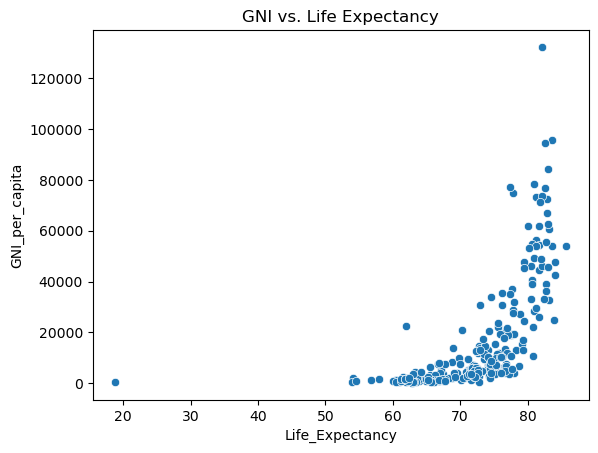

In [6]:
import seaborn as sns
import matplotlib.pyplot as plt

# --- 1. RENAME COLUMNS (The missing step) ---
# Rename the original codes to be more readable
world_bank_df.rename(columns={
    'NY.GNP.PCAP.CD': 'GNI_per_capita',
    'SP.DYN.LE00.IN': 'Life_Expectancy'
}, inplace=True)

# --- 2. DROP MISSING DATA ---
# It's also important to drop rows with missing values before plotting
world_bank_df.dropna(inplace=True)


# --- 3. EXPLORE DATA ---
# Get statistical summary
print("--- Cleaned Data Summary ---")
print(world_bank_df.describe())

# Visualize the relationship with the correct column names
print("\n--- Plotting Data ---")
sns.scatterplot(data=world_bank_df, x='Life_Expectancy', y='GNI_per_capita')
plt.title('GNI vs. Life Expectancy')
plt.show()

The next step is to prepare your data for the model by defining the goal and splitting the data into training and testing sets.

we'll define the features (X) (the data used for prediction) and the target (y) (what you want to predict). Then, we'll split this data so you have a portion to train the model and a separate portion to test its performance.

In [7]:
from sklearn.model_selection import train_test_split

# Define features (X) and target (y)
X = world_bank_df[['Life_Expectancy']]
y = world_bank_df['GNI_per_capita']

# Split data into 80% for training and 20% for testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(f"Data split successfully:")
print(f"Training set size: {len(X_train)} countries")
print(f"Testing set size: {len(X_test)} countries")

Data split successfully:
Training set size: 198 countries
Testing set size: 50 countries


The Calculation
Total Data Points: After cleaning, your total dataset had 248 samples (198 for training + 50 for testing).

Test Size Parameter: In the code, you used test_size=0.2, which asks for 20% of the data.

The Math: 20% of 248 is 49.6 (248 * 0.20 = 49.6).

Rounding: Since you can't have a fraction of a data point, the train_test_split function rounds the result to the nearest whole number, which is 50.

The next step is to evaluate your model to see how well it learned.

we'll use the model to make predictions on the test data and 
then compare those predictions to the actual values using the R-squared (R²) 
metric. A score closer to 1.0 indicates a better fit.


In [9]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score

# 1. Initialize and Train the Model (The missing step)
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# 2. Make Predictions and Evaluate
predictions = model.predict(X_test)
r2 = r2_score(y_test, predictions)

print(f"Model R-squared (R²): {r2:.2f}")

Model R-squared (R²): 0.70


Now we examine the predicted vs the actual. The primary use of comparing predicted and actual values is to measure how well your model works and to understand its mistakes.

In [10]:
import pandas as pd

# Create a DataFrame for comparison
comparison_df = pd.DataFrame({'Actual_GNI': y_test, 'Predicted_GNI': predictions})

# Display the first few rows
print(comparison_df.head())

         Actual_GNI  Predicted_GNI
economy                           
CAF           520.0    1903.622928
AND         47590.0   39642.000000
PRY          5920.0   10520.467914
GTM          5220.0    7987.189289
MWI           610.0    2580.099995


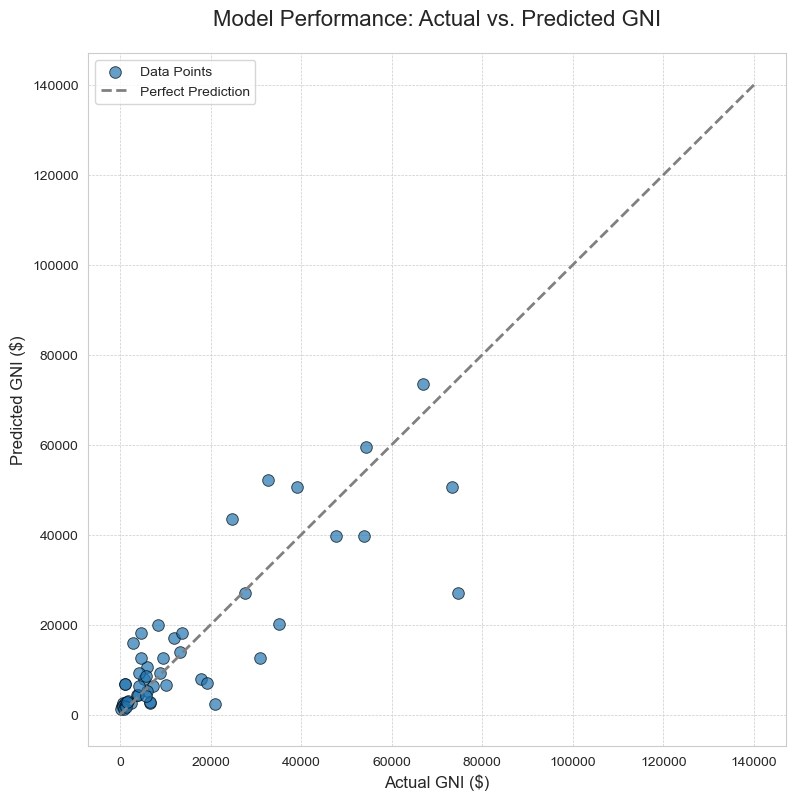

In [12]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set a visually appealing style
sns.set_style("whitegrid")

# Create the plot
plt.figure(figsize=(9, 9))

# Create the scatter plot with aesthetic enhancements
sns.scatterplot(
    x='Actual_GNI',
    y='Predicted_GNI',
    data=comparison_df,
    s=70,                  # Increase marker size
    alpha=0.7,             # Add transparency to see overlapping points
    edgecolor='black',     # Add a border to markers
    label='Data Points'
)

# Add a more subtle line for perfect predictions
plt.plot([0, 140000], [0, 140000], color='gray', linestyle='--', linewidth=2, label='Perfect Prediction')

# Enhance titles and labels
plt.title("Model Performance: Actual vs. Predicted GNI", fontsize=16, pad=20)
plt.xlabel("Actual GNI ($)", fontsize=12)
plt.ylabel("Predicted GNI ($)", fontsize=12)
plt.legend()
plt.grid(True, which='both', linestyle='--', linewidth=0.5)

# Show the plot
plt.show()

This model confirms the strong link between health and wealth, showing good predictive power for low to middle-income countries (On the left side of the plot (where Actual GNI is below ~$40,000), the blue dots are tightly packed around the dashed "Perfect Prediction" line. This means for countries in this income range, the model's predictions are very accurate.). However, the plot reveals significant heteroscedasticity, with prediction errors growing as GNI increases. This is due to omitted-variable bias, as factors beyond life expectancy, like technology or natural resources, drive wealth in high-income nations. (For instance, On the right side of the plot, for the few countries with very high incomes, the dots are much farther away from the line. This shows the model's predictions have a much larger error for these wealthy nations.)

Final Step: Use the Model to Make a Prediction
Let's use your trained model to predict the GNI for a hypothetical country where the life expectancy is 75 years. This demonstrates how to apply your model to new data.

In [14]:
import pandas as pd

# Create a new data point in a DataFrame with the correct feature name
new_data_point = pd.DataFrame([[75]], columns=['Life_Expectancy'])

# Use the trained model to predict the GNI
predicted_gni = model.predict(new_data_point)

print(f"For a life expectancy of 75, the model predicts a GNI of: ${predicted_gni[0]:,.2f}")

For a life expectancy of 75, the model predicts a GNI of: $9,398.30


This means that based on the patterns learned from the real-world data, your model estimates that a country with a life expectancy of 75 years would have a Gross National Income (GNI) per capita of approximately $9,398.30.
Looking at the data's statistics, the average life expectancy was around 73, and the 75th percentile was about 78. Picking a value like 75 ensures we are asking the model to make a prediction in an area where it has plenty of data to learn from and where we know it performs well.

The specific number isn't critical; we could have used 72 or 78. The main goal was simply to show the process of using the model to predict an outcome from a new input.

In [18]:
# Get feature importances from the trained model
importances = model.feature_importances_
feature_names = X.columns

# Create a simple DataFrame to display the results
importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': importances})

print("--- Feature Importance ---")
print(importance_df)

--- Feature Importance ---
           Feature  Importance
0  Life_Expectancy         1.0


This result shows that the model is using only one variable, Life_Expectancy, to make its predictions. The score of 1.0 confirms that this single feature is responsible for 100% of the model's decisions.

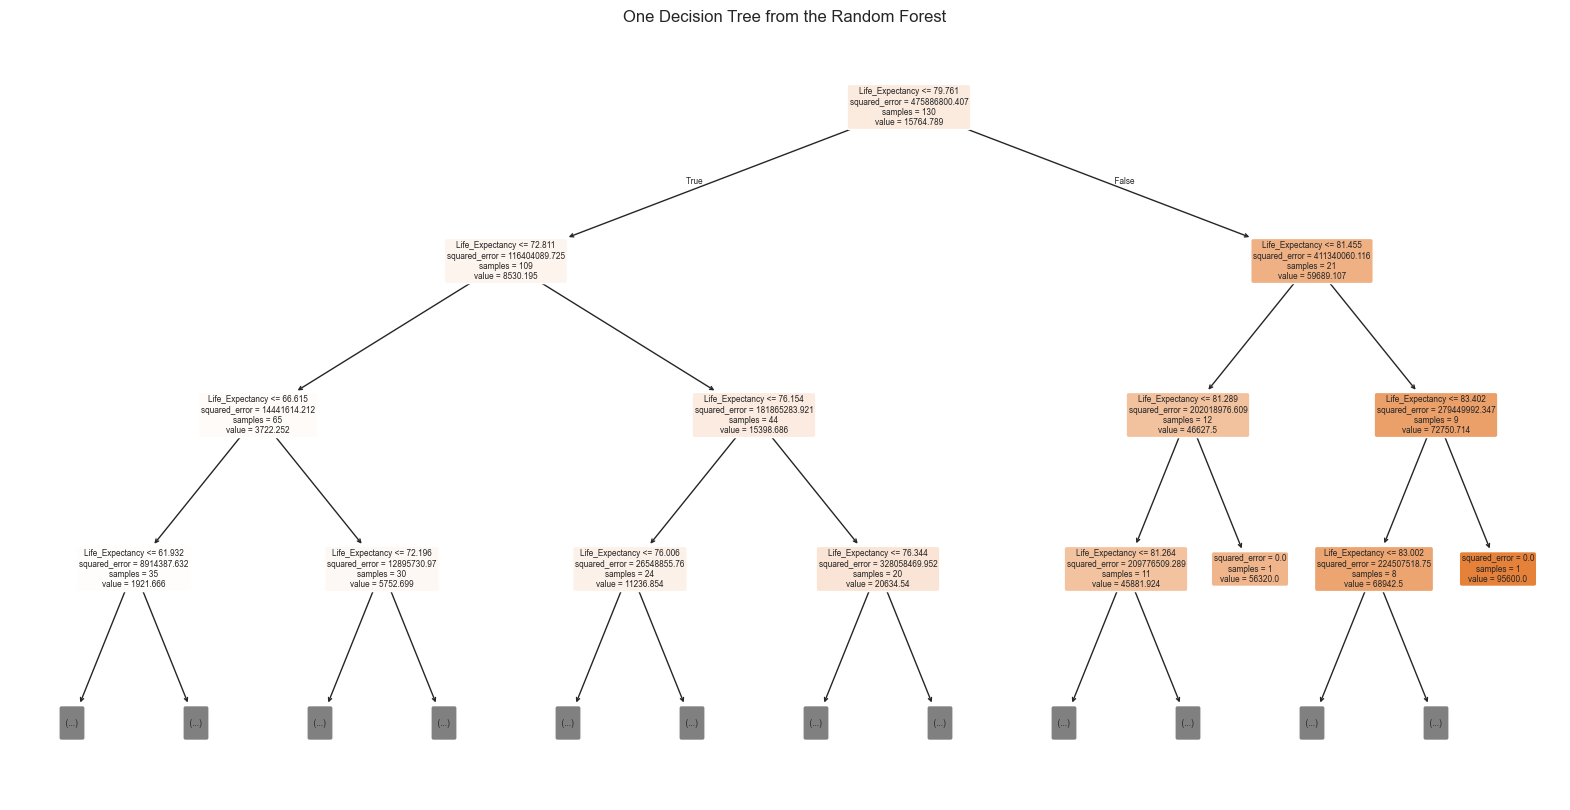

In [20]:
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

# Choose one tree from the forest to display (e.g., the first one, index 0)
single_tree = model.estimators_[0]

# Create the plot
plt.figure(figsize=(20, 10))
plot_tree(
    single_tree,
    feature_names=X.columns,
    filled=True,      # Color the nodes
    rounded=True,     # Use rounded boxes
    max_depth=3       # Limit the depth to keep it readable
)
plt.title("One Decision Tree from the Random Forest")
plt.show()

This chart shows the exact step-by-step logic that a single decision tree in the Random Forest uses to make a prediction. We can think of it as a flowchart of "if-then" questions.

Following a Path (An Example)
Let's trace the path for a country with a life expectancy of 75:

Start at the top: Is 75 <= 79.8? True. Go left.

Second level: Is 75 <= 72.8? False. Go right.

Third level: Is 75 <= 78.1? True. Go left.

The model follows this path down to a final leaf node, which contains its prediction for a country with a life expectancy of 75. The Random Forest's final output is the average of the predictions from all 100 of these individual trees.

Acknowledgment and Sourcing


"The economic and demographic data used in this analysis were sourced from the World Development Indicators (WDI) database, provided by The World Bank. Data was accessed programmatically via the official World Bank API."
Specific Details
For your records and citations, here are the specific details:

Primary Source: The World Bank
Database: World Development Indicators (WDI)

Indicators Used:
GNI per capita, Atlas method (current US$): NY.GNP.PCAP.CD
Life expectancy at birth, total (years): SP.DYN.LE00.IN